In [46]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13, 8

### Получите данные и загрузите их в рабочую среду.

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Проведите первичный анализ.

In [3]:
df.describe

<bound method NDFrame.describe of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Ma

### Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками

In [4]:
# Пропуски отсутствуют, но имеются некорректные значиния типа - "?"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# Визуально проверим dataset на пропуски разного характера. Видим, что есть пропуски данных в 'workclass', 'occupation',
# 'native-country'
dict_of_values = {}
for col in df.columns:
    dict_of_values[col] = df[col].unique()

dict_of_values

{'age': array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
        37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
        47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
        80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
        76, 84, 89, 88, 87, 86], dtype=int64),
 'workclass': array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
        'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype=object),
 'fnlwgt': array([226802,  89814, 336951, ..., 129912, 255835, 257302], dtype=int64),
 'education': array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
        'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
        '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
       dtype=object),
 'educational-num': array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
       dtype=int64),
 'marital-status': array

In [6]:
# Посмотрим в каждом разделе сколько пропусков
print(f"Workclass\n--------\n{df['workclass'].value_counts()}\n")
print(f"Occupation\n--------\n{df['occupation'].value_counts()}\n")
print(f"Native-country\n--------\n{df['native-country'].value_counts()}\n")

Workclass
--------
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Occupation
--------
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

Native-country
--------
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          18

In [7]:
# Удалим все значения с "?"
df = df[df['workclass']!='?']
df = df[df['occupation']!='?']
df = df[df['native-country']!='?']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


### Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [8]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


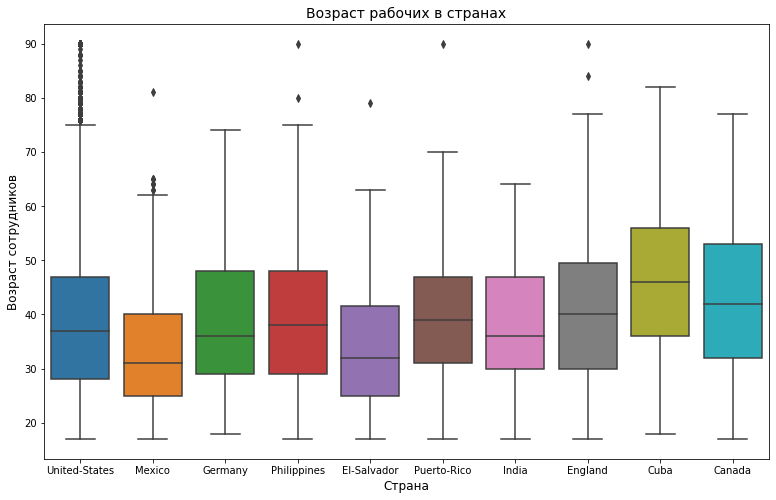

In [47]:
# Смотрим распределение возраста сотрудников в различных странах.
country = df['native-country'].value_counts().sort_values(ascending=False).head(10).index.values
sns.boxplot(x='native-country', y='age', 
            data=df[df['native-country'].isin(country)])
plt.title('Возраст рабочих в странах', fontdict={'size':14})
plt.xlabel('Страна', fontdict={'size':12})
plt.ylabel('Возраст сотрудников', fontdict={'size':12})

plt.show()

### Преобразуйте категориальные признаки.

In [10]:
# Сделаем новый датафрейм и уберем из него признаки, которые не будут использоваться
new_df = df.drop(columns=['fnlwgt', 'educational-num', 'relationship', 'marital-status',\
                          'capital-gain', 'capital-loss', 'race'])

In [11]:
# Подберем признаки
new_df.columns

Index(['age', 'workclass', 'education', 'occupation', 'gender',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [12]:
# Создадим их в отдельном df
signs = new_df[['age', 'workclass', 'education', 'occupation', 'gender', 'hours-per-week', 'native-country']]
signs.head()

,age,workclass,education,occupation,gender,hours-per-week,native-country
0,25,Private,11th,Machine-op-inspct,Male,40,United-States
1,38,Private,HS-grad,Farming-fishing,Male,50,United-States
2,28,Local-gov,Assoc-acdm,Protective-serv,Male,40,United-States
3,44,Private,Some-college,Machine-op-inspct,Male,40,United-States
5,34,Private,10th,Other-service,Male,30,United-States


In [13]:
# Заведем наши признаки в X, которые классифицироны one-hot 0/1
X = pd.get_dummies(signs, columns=['workclass', 'education', 'occupation', 'gender', 'native-country'])
X.head()

,age,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,30,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# Переведем нашу искому величину в 2 класса 0 и 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(new_df['income'])
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [15]:
le.transform(['<=50K', '>50K'])
le.transform(['<=50K', '>50K'])

array([0, 1])

In [16]:
# Запишем в искомую "y" наши признаки
y = pd.Series(data=le.transform(new_df['income']))

### Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое

In [17]:
from sklearn.model_selection import train_test_split # метод для разделения выборки на обучающуюся и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

In [18]:
from sklearn.linear_model import LogisticRegression # Для обучения логистической регрессии 
from sklearn.svm import SVC # Для обучения опорных векторов

from sklearn.pipeline import make_pipeline  # пайплайны
from sklearn.preprocessing import StandardScaler # нормализация

In [38]:
# Логистическая регрессия
lr_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [39]:
# Обучаем
lr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [42]:
# Метод опорных векторов
SVC_model = make_pipeline(
    StandardScaler(),
    SVC()
)

In [43]:
# Обучаем
SVC_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

### Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

In [40]:
# Предсказания лог. регрессия
predictions = lr_model.predict(X_test)

In [41]:
# Score лог. регрессия
lr_model.score(X_test,y_test)

0.8071862907683803

In [48]:
# Предсказания SVC
predictions_SVC = SVC_model.predict(X_test)

In [49]:
# Score SVC
SVC_model.score(X_test,y_test)

0.8069651741293532

# Сформулируйте выводы по проделанной работе.

### 1. Кратко опишите какие преобразования были сделаны с данными.

Мы взяли датасет, загрузили его, проверили на целостность данных и убрали пропуски.
После преобразовали категориальные данные в бинарные испольщуя one-hot и LabelEncoder.
Далее разделяли данные на 2 выборки (обучение и тест 80/20), заводили переменные признаокв и искомого, обучали модели 
и сравнивали их точность мтеодом score

### 2. Сравните точность двух моделей.

С предобработанными данными точность моделей практически идентична. На 0.0002... Точнее Логистическая регрессия.

### 3. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?

С поставленной задачей модели справились, но их точность невысока. Хотя это зависит от поставленной задачи и уровня доверия, в который мы хотим уложиться. В первую очередь, я бы "поигрался с признаками", включая/выключая их и изменяя общее количество. Количество признаков возможно бы уменьшил, так как у нас их наверно многовато.